In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mxnet import autograd, nd
import random


In [2]:
npInputDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npInputDataset.npy")
npXTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npXTargetDataset.npy")
npYTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npYTargetDataset.npy")
npUTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npUTargetDataset.npy")
npVTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npVTargetDataset.npy")
npAccXTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npXTargetDataset.npy")
npAccYTargetDataset= np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npAccYTargetDataset.npy")
npRhoTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npRhoTargetDataset.npy")
npPTargetDataset = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npPTargetDataset.npy")
npCollidingTotal = np.load(f"/Users/maxan/Documents/Master'sThesis/DATA/npCollidingTotal.npy")

In [3]:
npXTargetDataset = np.expand_dims(npXTargetDataset, axis=-1)
npYTargetDataset= np.expand_dims(npYTargetDataset, axis=-1)
npUTargetDataset= np.expand_dims(npUTargetDataset, axis=-1)
npVTargetDataset= np.expand_dims(npVTargetDataset, axis=-1)
npAccXTargetDataset = np.expand_dims(npAccXTargetDataset, axis=-1)
npAccYTargetDataset= np.expand_dims(npAccYTargetDataset, axis=-1)
npRhoTargetDataset =np.expand_dims(npRhoTargetDataset, axis=-1)
npPTargetDataset = np.expand_dims(npPTargetDataset, axis=-1)
npCollidingTotal = np.expand_dims(npCollidingTotal,axis=-1)

# Data Overview

In [4]:
# The number of data
NData = 100

# The number of particles
NParticles = 100

# The number of TimeSteps
NTimeSteps = 200

# The number of Parameters
NParameters = 4

# The number of Targets
NTargets = 8

# The number of data in test dataset
Ntestdata =25

In [5]:
class reNeuron:
    
    def __init__(self,TargetName,Unit,ModelNumber, address,NParticles = 100, NTimeStep = 200, NTrainData = 56, NValData = 19, NTestData = 25):
        
        self.Unit = Unit
        self.TargetName = TargetName
        self.ModelNumber = ModelNumber
        self.NParticles = NParticles
        self.NTimeStep = NTimeStep
        self.weights = np.load(f"{address}/Model{ModelNumber}weights.npy")
        self.bias = np.load(f"{address}/Model{ModelNumber}bias.npy")
        self.valLosses = np.load(f"{address}/Model{ModelNumber}val_losses.npy")
        self.losses = np.load(f"{address}/Model{ModelNumber}losses.npy")
        self.predict_losses = np.load(f"{address}/Model{ModelNumber}predict_losses.npy")
        self.X_train = np.load(f"{address}/Model{ModelNumber}X_train.npy")
        self.X_test =np.load(f"{address}/Model{ModelNumber}X_test.npy")
        self.X_Val = np.load(f"{address}/Model{ModelNumber}X_Val.npy")
        self.y_train =np.load(f"{address}/Model{ModelNumber}y_train.npy")
        self.y_test = np.load(f"{address}/Model{ModelNumber}y_test.npy")
        self.y_val =np.load(f"{address}/Model{ModelNumber}y_val.npy")
        self.NTrainData = NTrainData
        self.NValData = NValData
        self.NTestData = NTestData
    
    def perParticle(self):
        
        errPerParticles = np.sum(np.abs(self.predict_losses),axis=-4)/self.NTestData
        errPerParticles = np.sum(errPerParticles,axis=-3)/self.NTimeStep
        
        return errPerParticles
        
    def perTimeStep(self):
        
        errPerTimeStep = np.sum(np.abs(self.predict_losses),axis=-4)/self.NTestData
        errPerTimeStep = np.sum(errPerTimeStep,axis=-2)/self.NParticles        
        return errPerTimeStep
    
    def forpass(self, x):
        y_hat = x * self.weights + self.bias
        return y_hat
    
        
    def prediction(self, Data):      
        
        predData = Data * self.weights + self.bias
        predData = np.sum(predData, axis=-1)
        predData = np.expand_dims(predData, axis=-1)
        
        return predData        

# 300 Epochs

In [6]:
Model1 = reNeuron(TargetName= "The x-coordinates of the particles",
                 Unit = "[m]",
                 ModelNumber=1, 
                 address=f"/Users/maxan/Documents/Master'sThesis/MachineLearning/ML_from_code_level/Results_3000epochs_std_set_0.01"                  
                 )
Model2 = reNeuron(TargetName= "The y-coordinates of the particles",
                 Unit = "[m]",
                 ModelNumber=2, 
             address=f"/Users/maxan/Documents/Master'sThesis/MachineLearning/ML_from_code_level/Results_3000epochs_std_set_0.01"         
                 )
Model3 = reNeuron(TargetName= "The x-direction velocity of the particles",
                 Unit = "[m/s]",
                 ModelNumber=3, 
             address=f"/Users/maxan/Documents/Master'sThesis/MachineLearning/ML_from_code_level/Results_3000epochs_std_set_0.01"         
                 )
Model4 = reNeuron(TargetName= "The y-direction velocity of the particles",
                 Unit = "[m/s]",
                 ModelNumber=4, 
            address=f"/Users/maxan/Documents/Master'sThesis/MachineLearning/ML_from_code_level/Results_3000epochs_std_set_0.01"         
                 )
Model5 = reNeuron(TargetName= "The x-direction acceleration of the particles",
                 Unit = "[m/s^2]",
                 ModelNumber=5, 
          address=f"/Users/maxan/Documents/Master'sThesis/MachineLearning/ML_from_code_level/Results_3000epochs_std_set_0.01"                   
                 )
Model6 = reNeuron(TargetName= "The y-direction acceleration of the particles",
                 Unit = "[m/s^2]",
                 ModelNumber=6, 
           address=f"/Users/maxan/Documents/Master'sThesis/MachineLearning/ML_from_code_level/Results_3000epochs_std_set_0.01"                     
                 )
Model7 = reNeuron(TargetName= "The density of the particles",
                 Unit = "[kg/m^3]",
                 ModelNumber=7, 
          address=f"/Users/maxan/Documents/Master'sThesis/MachineLearning/ML_from_code_level/Results_3000epochs_std_set_0.01"         
                 )
Model8 = reNeuron(TargetName= "The pressure of the particles",
                 Unit = "[Pa]",
                 ModelNumber=8, 
     address=f"/Users/maxan/Documents/Master'sThesis/MachineLearning/ML_from_code_level/Results_3000epochs_std_set_0.01"           
                 )



In [7]:
# ML model list at 300 Epochs
Model = [Model1,Model2,Model3,Model4,Model5, Model6,Model7,Model8]

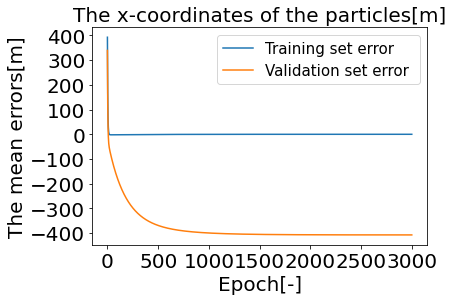

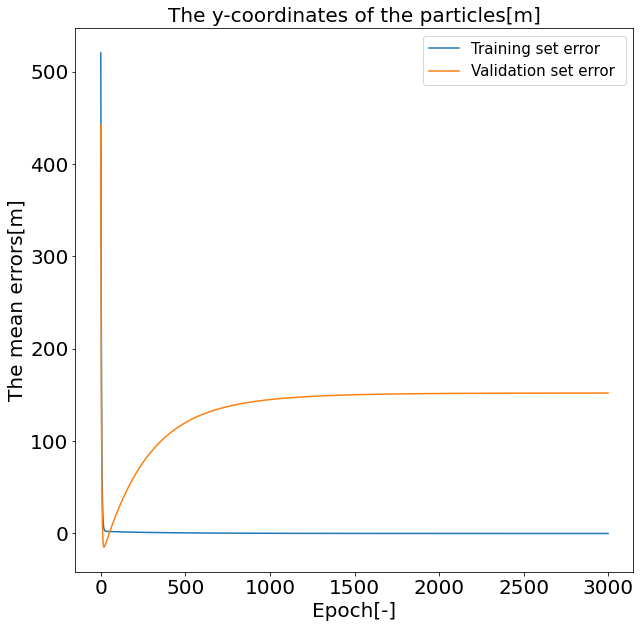

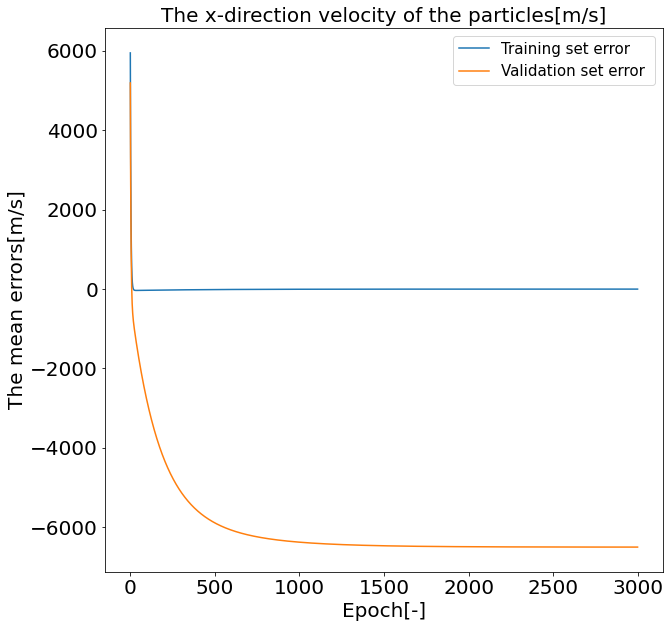

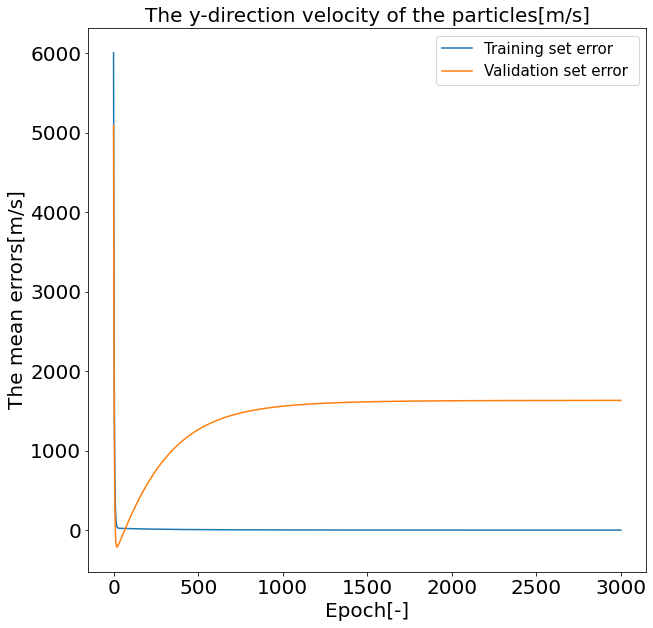

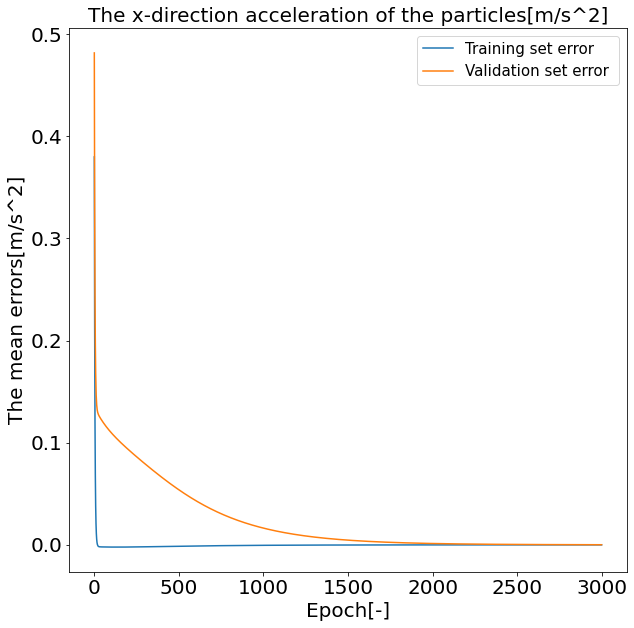

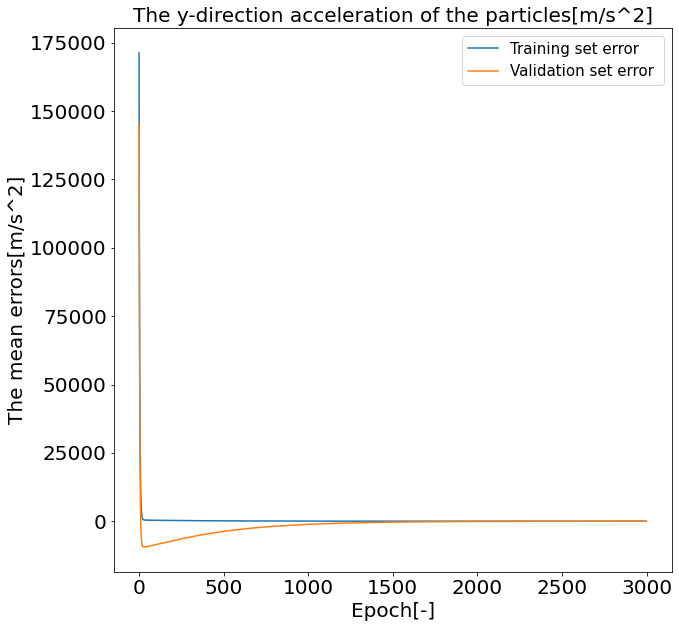

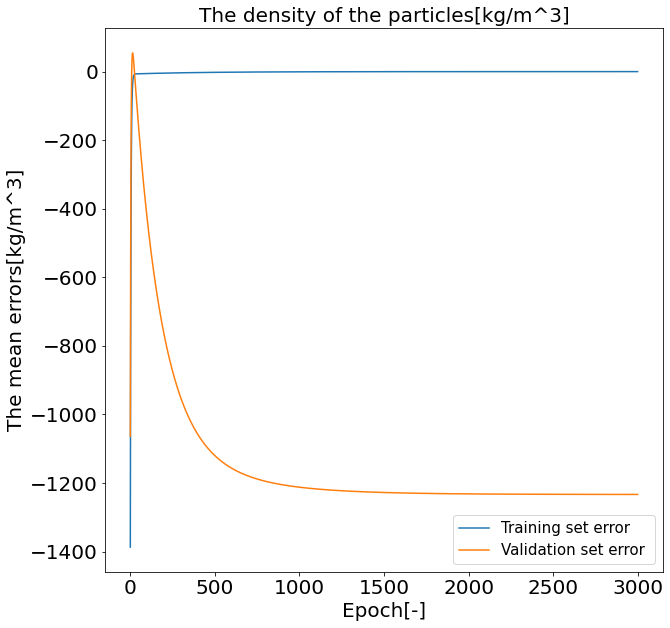

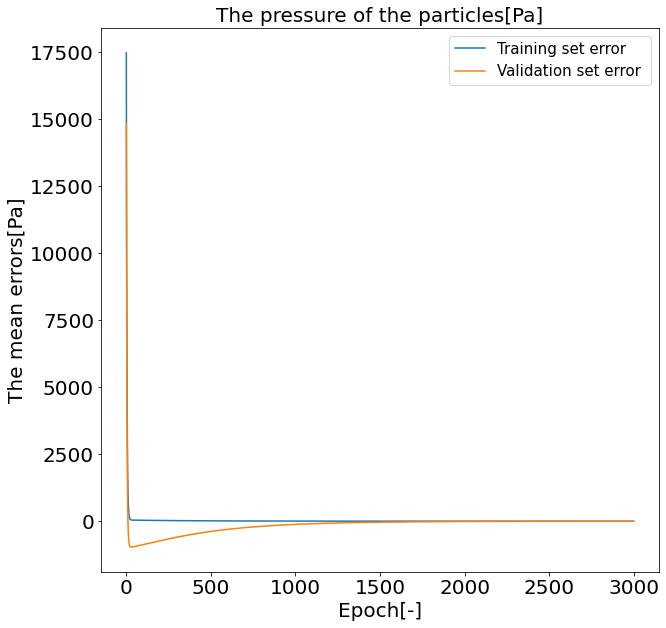

In [8]:
for NModel in Model:  
    plt.figure(NModel.ModelNumber)
    plt.plot((NModel.losses/NModel.NTrainData),label = "Training set error")
    plt.plot((NModel.valLosses/NModel.NValData), label = "Validation set error ")
    plt.xlabel('Epoch[-]', fontsize = 20)
    plt.xticks(fontsize= 20)
    plt.yticks(fontsize= 20)
    plt.title(f"{NModel.TargetName}{NModel.Unit}",fontsize=20)
    plt.ylabel(f'The mean errors{NModel.Unit}',fontsize=20)
    plt.rcParams['figure.figsize'] = [10, 10]
#     plt.ylim(0,np.abs(NModel.valLosses/NModel.NValData).max())
    plt.legend(prop={'size': 15}) 
    plt.show()



# Mean Absolute Error

In [9]:
npmeanAbsoluteError = np.array([np.sum(np.abs(Model1.predict_losses))/(Ntestdata*NTimeSteps*NParticles),
                                np.sum(np.abs(Model2.predict_losses))/(Ntestdata*NTimeSteps*NParticles),
                                np.sum(np.abs(Model3.predict_losses))/(Ntestdata*NTimeSteps*NParticles),
                                np.sum(np.abs(Model4.predict_losses))/(Ntestdata*NTimeSteps*NParticles),
                                np.sum(np.abs(Model5.predict_losses))/(Ntestdata*NTimeSteps*NParticles),
                                np.sum(np.abs(Model6.predict_losses))/(Ntestdata*NTimeSteps*NParticles),
                                np.sum(np.abs(Model7.predict_losses))/(Ntestdata*NTimeSteps*NParticles),
                                np.sum(np.abs(Model8.predict_losses))/(Ntestdata*NTimeSteps*NParticles)]
                                
                              ).reshape(-1,NTargets)
pdAbsoluteError = pd.DataFrame(npmeanAbsoluteError)
pdAbsoluteError.columns = [Model1.TargetName,
                           Model2.TargetName,
                           Model3.TargetName,
                           Model4.TargetName,
                           Model5.TargetName,
                           Model6.TargetName,
                           Model7.TargetName,
                           Model8.TargetName]
pdAbsoluteError
                               


,The x-coordinates of the particles,The y-coordinates of the particles,The x-direction velocity of the particles,The y-direction velocity of the particles,The x-direction acceleration of the particles,The y-direction acceleration of the particles,The density of the particles,The pressure of the particles
0,0.002111,0.004968,0.045671,0.116861,0.001684,0.001878,0.014905,0.00004


In [10]:
# ML model list at the optimal point
Model = [Model1,Model2,Model3,Model4,Model5, Model6,Model7,Model8]

In [11]:
ColorList = ["b","g","r","c","m","y","lime","navy"]

### Error per particle

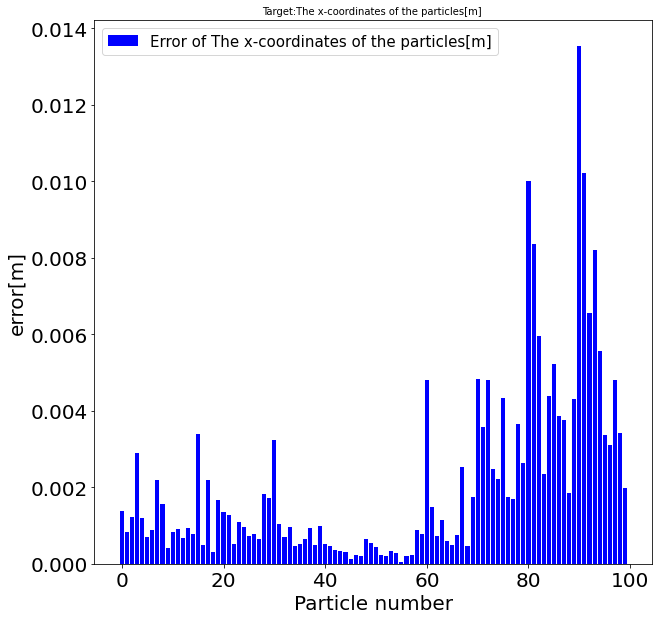

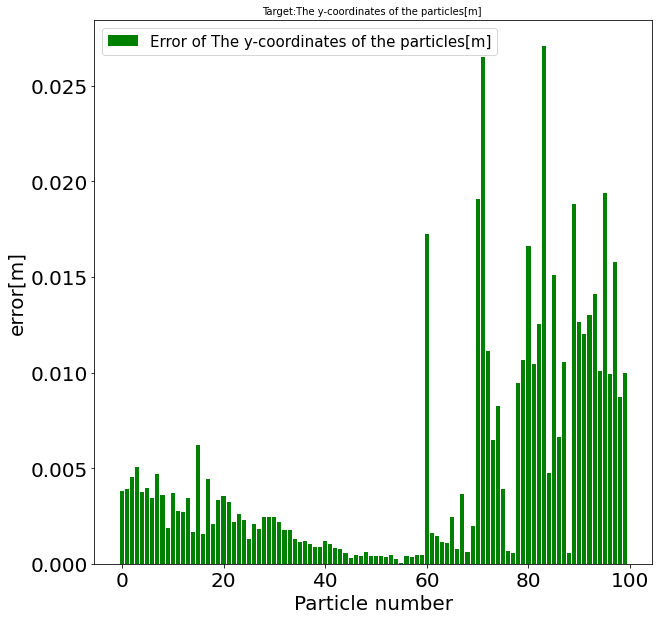

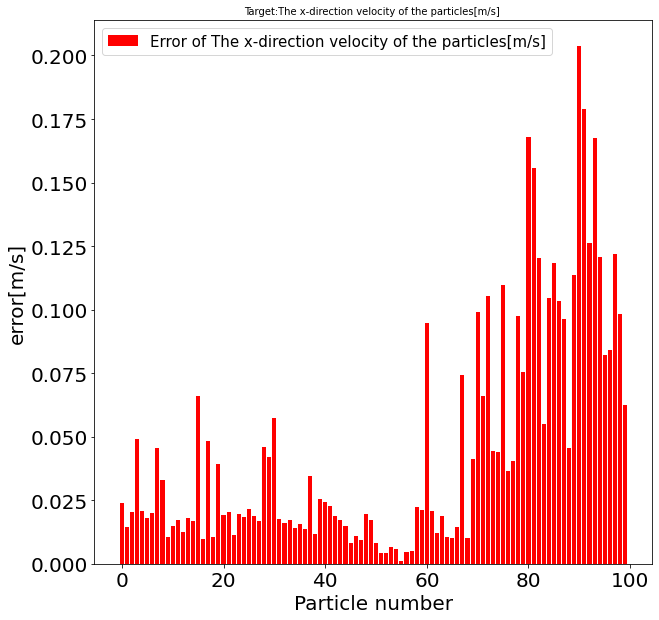

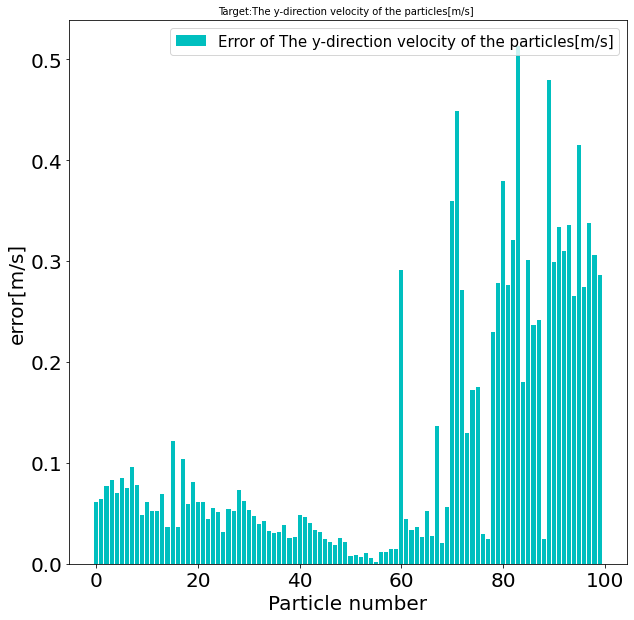

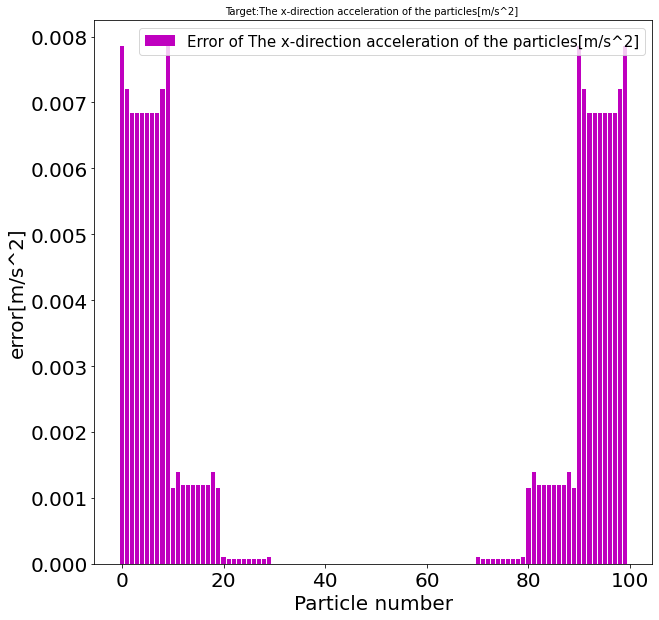

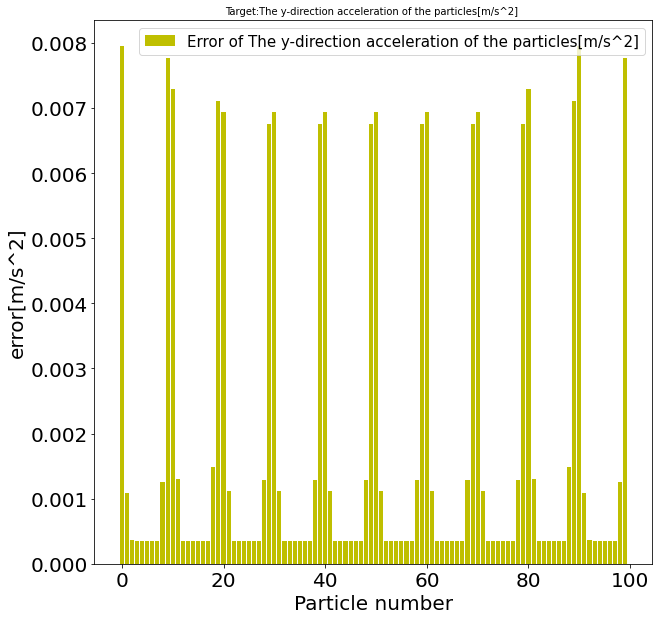

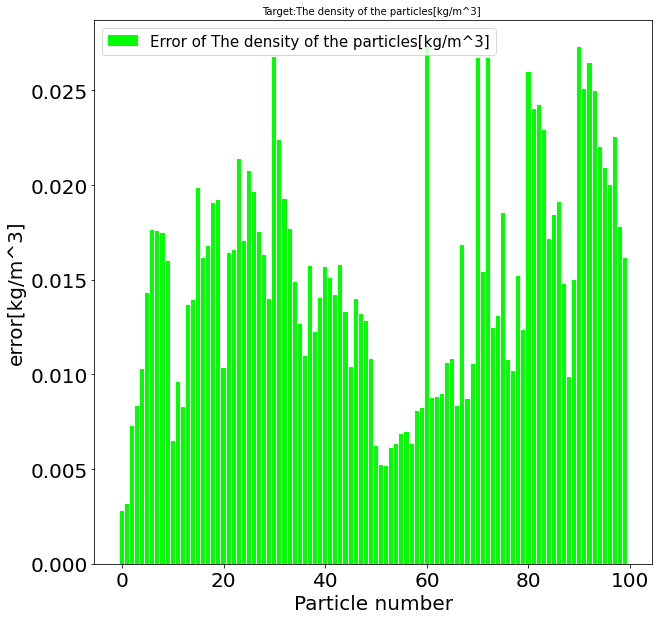

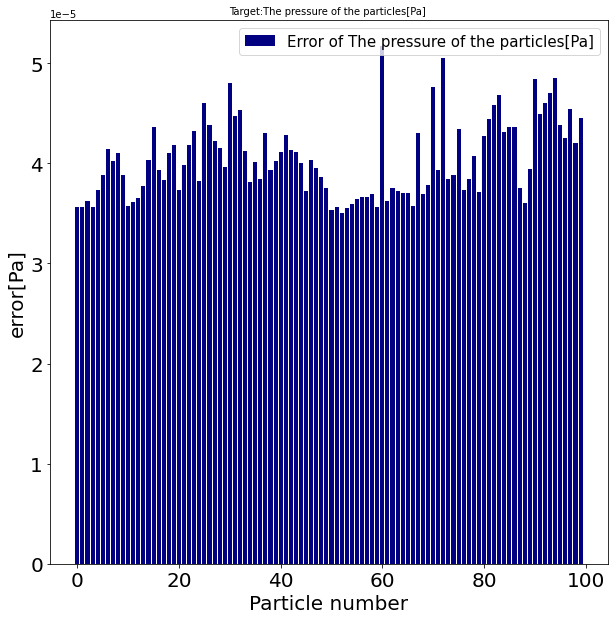

In [12]:
for NModel in Model:    

    errperParticles = NModel.perParticle()

    plt.figure(NModel.ModelNumber)
    plt.bar(np.arange(100),errperParticles.flatten(),label = f"Error of {NModel.TargetName}{NModel.Unit}", color =ColorList[NModel.ModelNumber-1] )
    plt.xlabel('Particle number', fontsize = 20)
    plt.xticks(fontsize= 20)
    plt.yticks(fontsize= 20)
    plt.title(f"Target:{NModel.TargetName}{NModel.Unit} ",fontsize=10)
    plt.ylabel(f'error{NModel.Unit}',fontsize=20)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.legend(prop={'size': 15})
    plt.show()


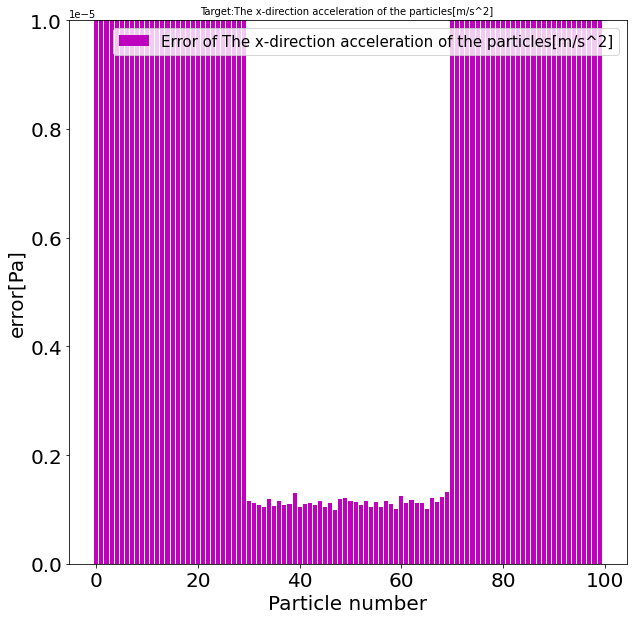

In [13]:
plt.bar(np.arange(100), Model5.perParticle().flatten(),label = f"Error of {Model5.TargetName}{Model5.Unit}", color =ColorList[Model5.ModelNumber-1] )
plt.xlabel('Particle number', fontsize = 20)
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.title(f"Target:{Model5.TargetName}{Model5.Unit} ",fontsize=10)
plt.ylabel(f'error{NModel.Unit}',fontsize=20)
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend(prop={'size': 15})
plt.ylim(0.0, 1e-5)
plt.show()

### Error per time-step

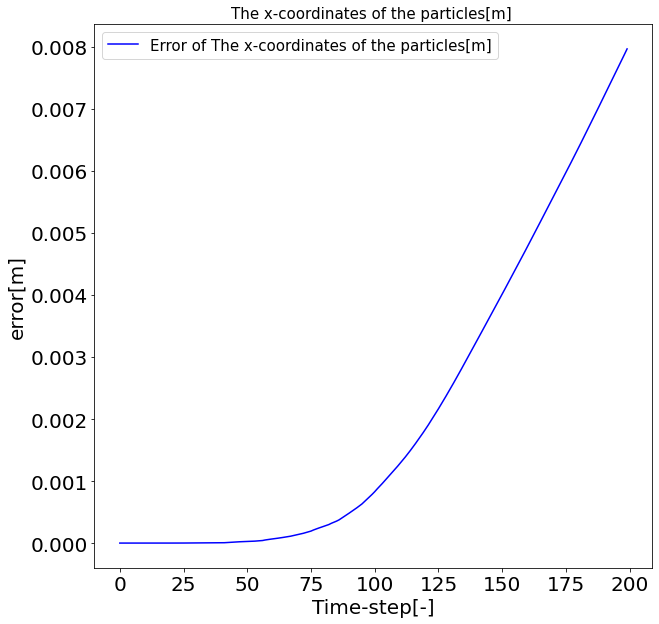

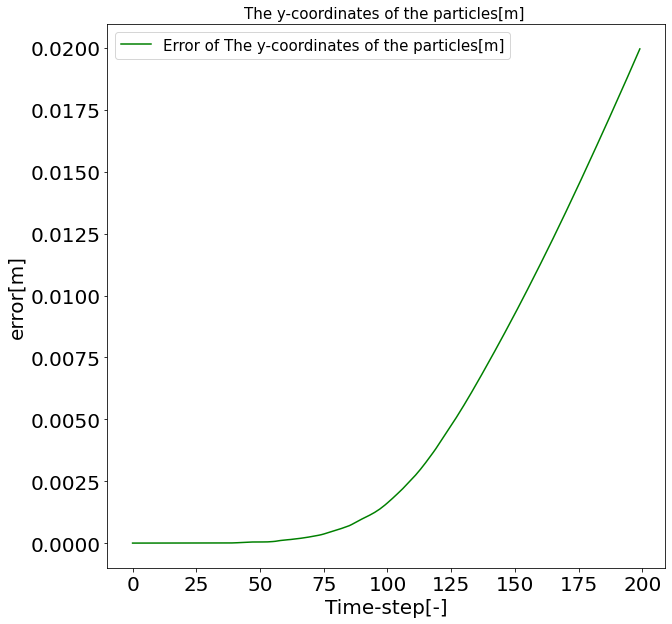

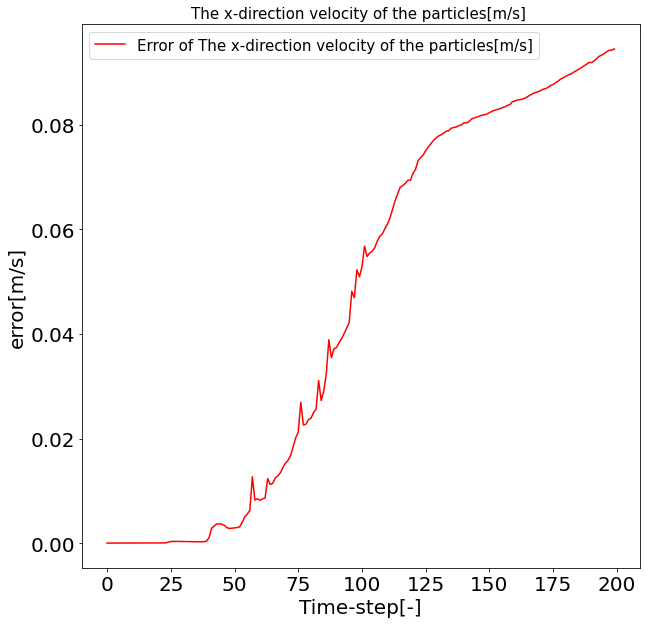

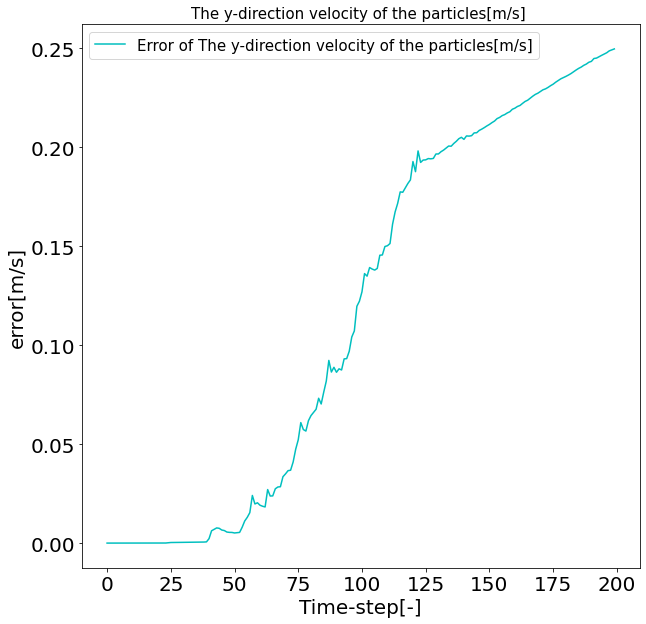

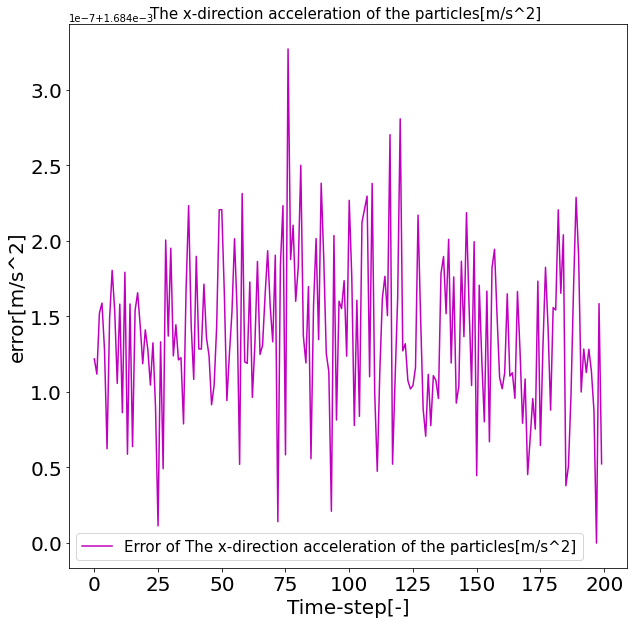

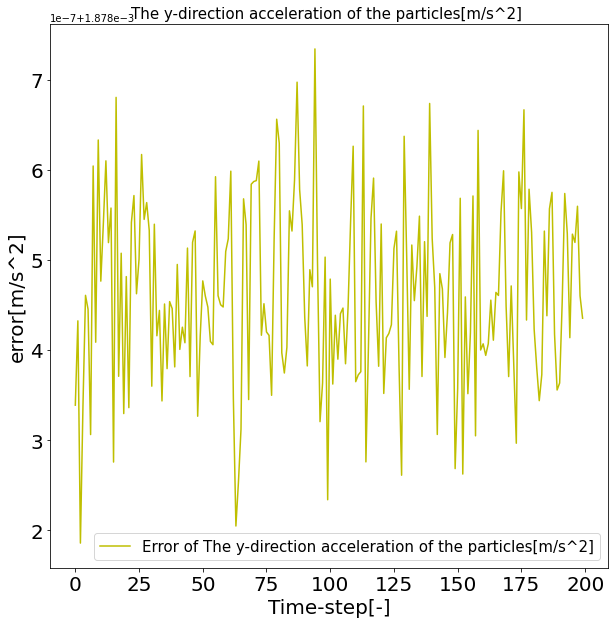

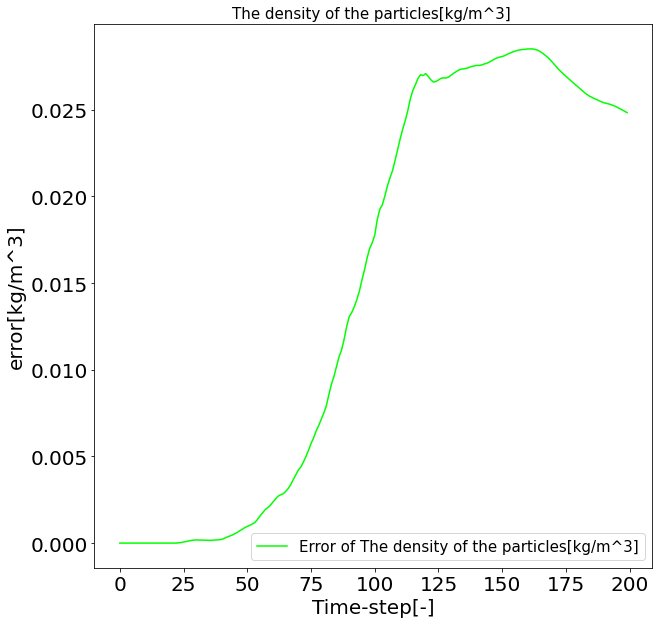

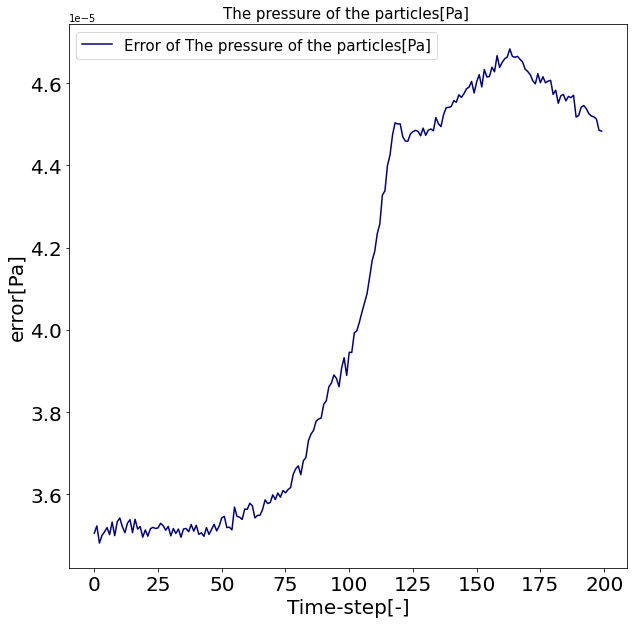

In [14]:
for NModel in Model:    

    errperTimeStep = NModel.perTimeStep()
    plt.figure(NModel.ModelNumber)
    plt.plot(errperTimeStep,label = f"Error of {NModel.TargetName}{NModel.Unit}", color =ColorList[NModel.ModelNumber-1])
    plt.xlabel('Time-step[-]', fontsize = 20)
    plt.xticks(fontsize= 20)
    plt.yticks(fontsize= 20)
    plt.title(f"{NModel.TargetName}{NModel.Unit} ",fontsize=15)
    plt.ylabel(f'error{NModel.Unit}',fontsize=20)
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.legend(prop={'size': 15})
    plt.show()

# Comparison of machine learning models and real values

### Machine Learning

In [15]:
Data = 10
TimeStep = 0

In [16]:
# predicted Data
predX = Model1.prediction(Model1.X_test)
predY = Model2.prediction(Model2.X_test)
predRho = Model7.prediction(Model7.X_test)


In [17]:
predRho.shape

(25, 200, 100, 1)

In [18]:
predRho.shape

(25, 200, 100, 1)

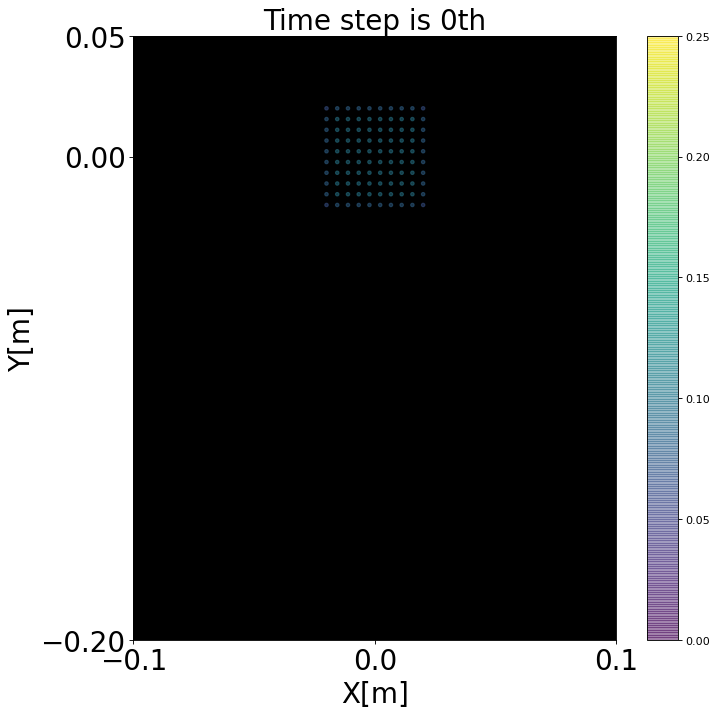

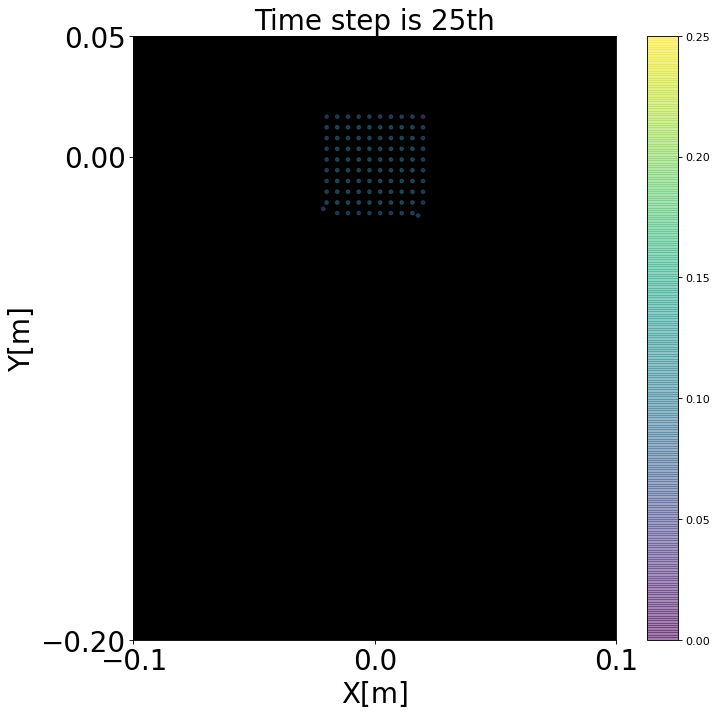

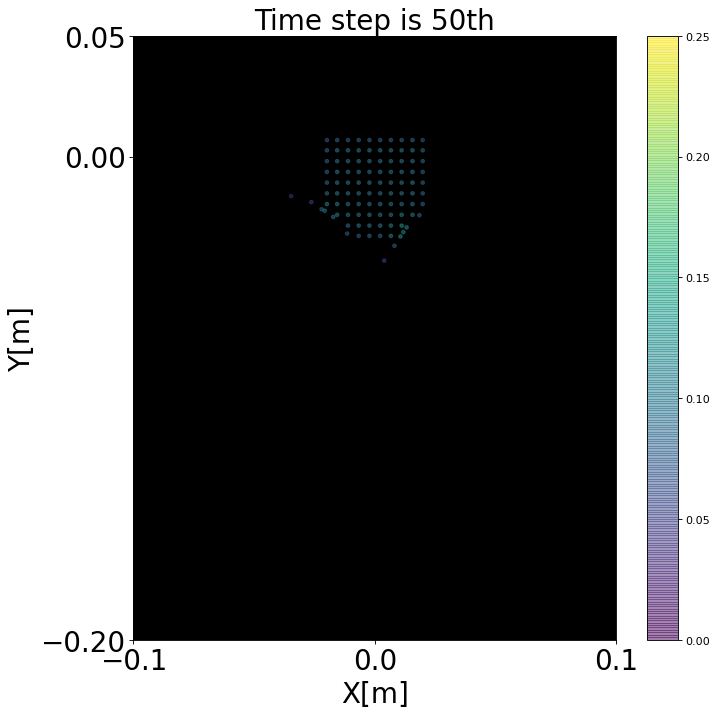

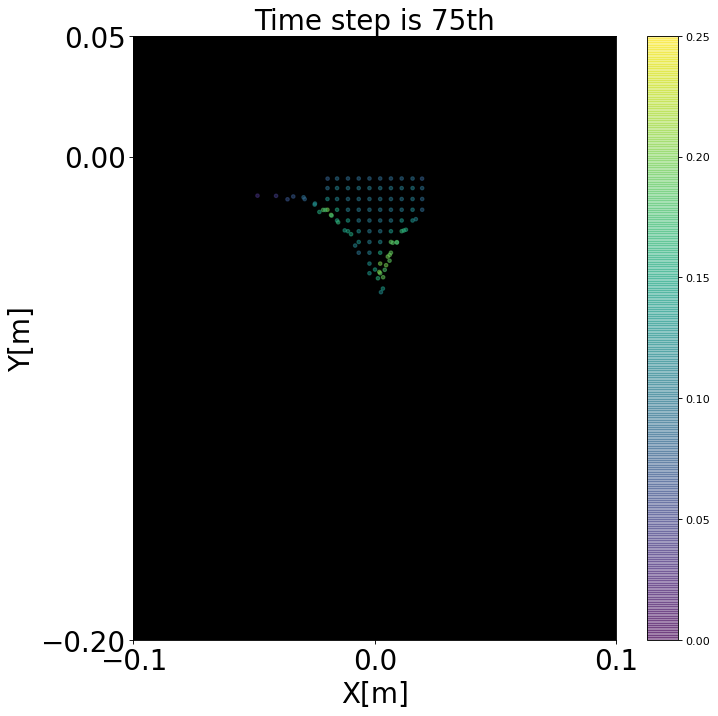

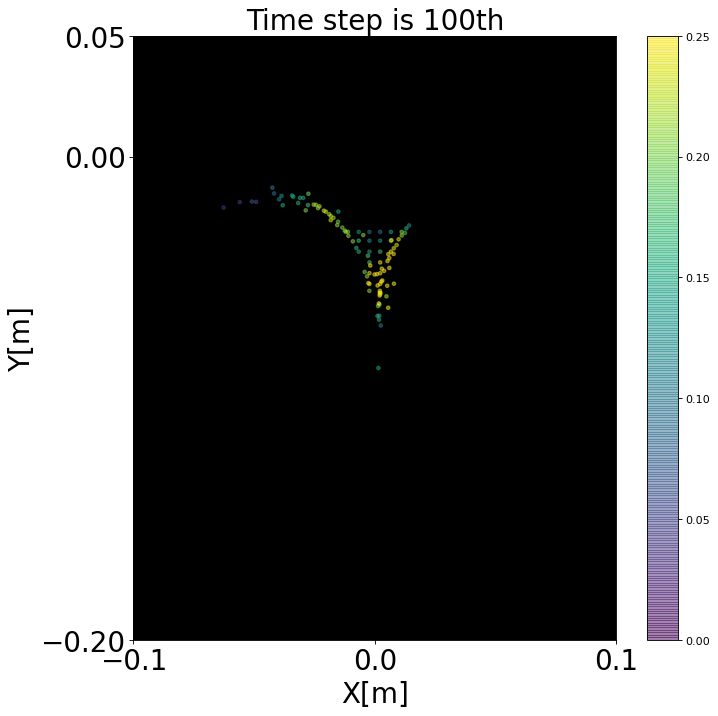

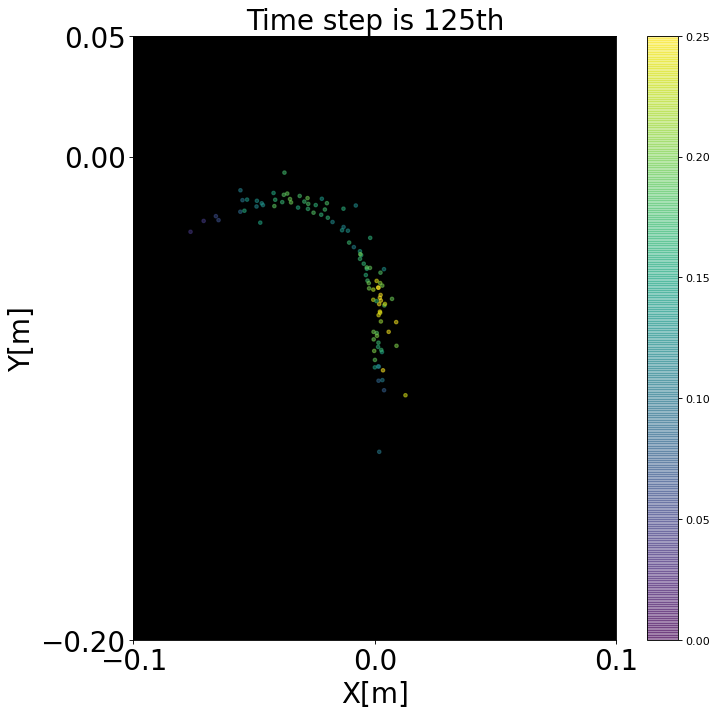

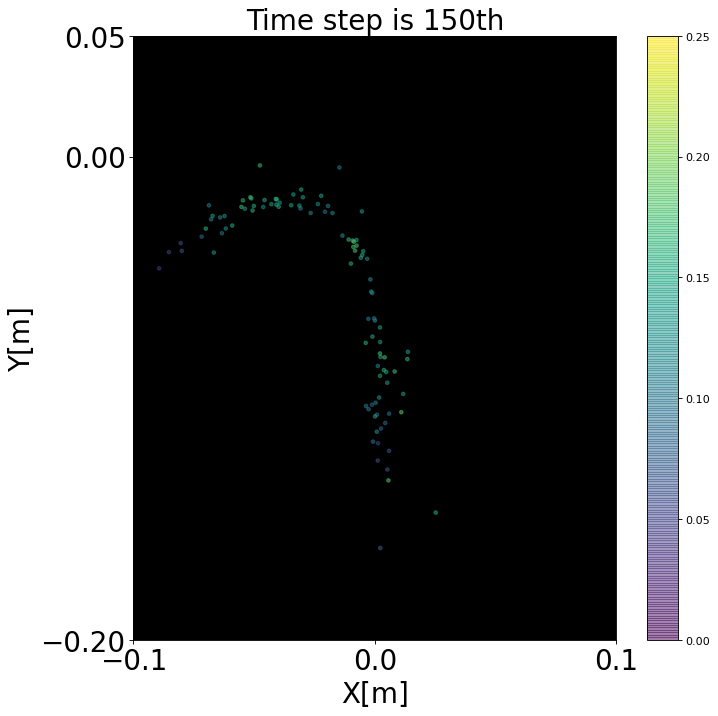

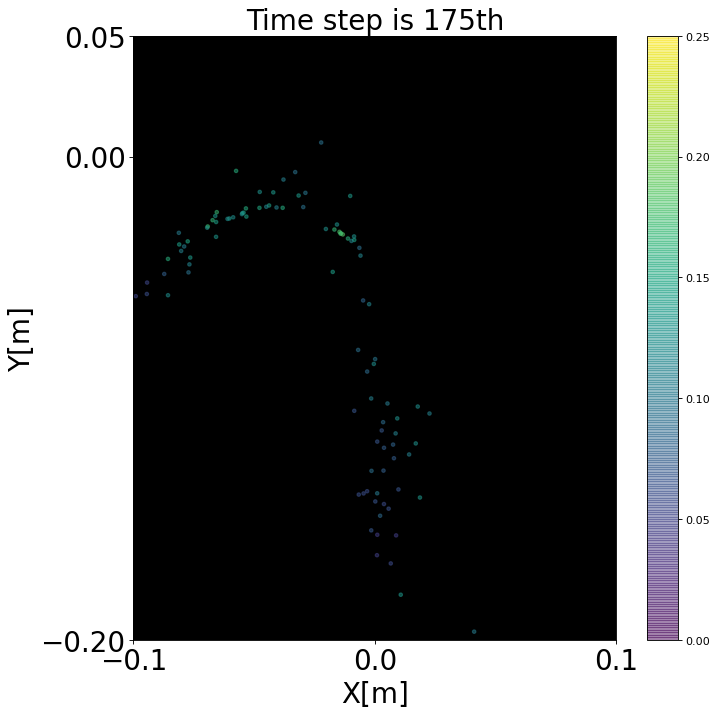

In [19]:
# visualization
for TimeStep in range(0,200,25):
    fig = plt.figure(figsize=(10, 10), dpi=80)
    ax = plt.subplot()

    Data = 24
    TimeStep = TimeStep
    plt.sca(ax)
    plt.cla()
    cval = predRho[Data][TimeStep].flatten()
    plt.scatter(predX[Data][TimeStep], predY[Data][TimeStep], c = cval,s=10, alpha=0.5)
    ax.set(xlim=(-0.10, 0.10), ylim=(-0.20, 0.05))
    ax.set_aspect('equal', 'box')
    ax.set_xticks([-0.10, 0, 0.10])
    ax.set_yticks([-0.20, 0, 0.05])
    ax.set_facecolor('black')
    plt.title(f"Time step is {TimeStep}th",fontsize= 25)
    ax.tick_params(labelsize='large')
    plt.colorbar()
    plt.xlabel('X[m]', fontsize = 25)
    plt.xticks(fontsize= 25)
    plt.yticks(fontsize= 25)
    plt.ylabel('Y[m]',fontsize=25)
    plt.clim(0.0,0.25)
    plt.show()


### SPH solver

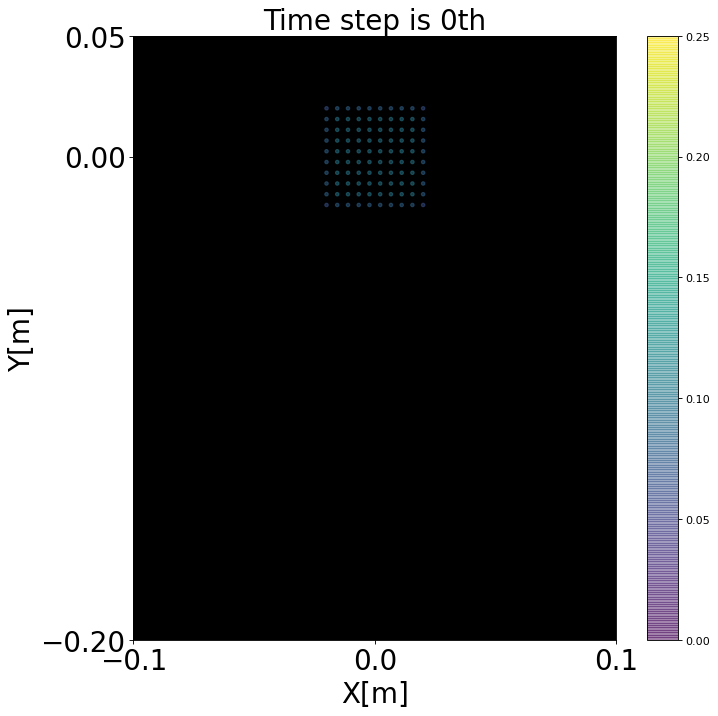

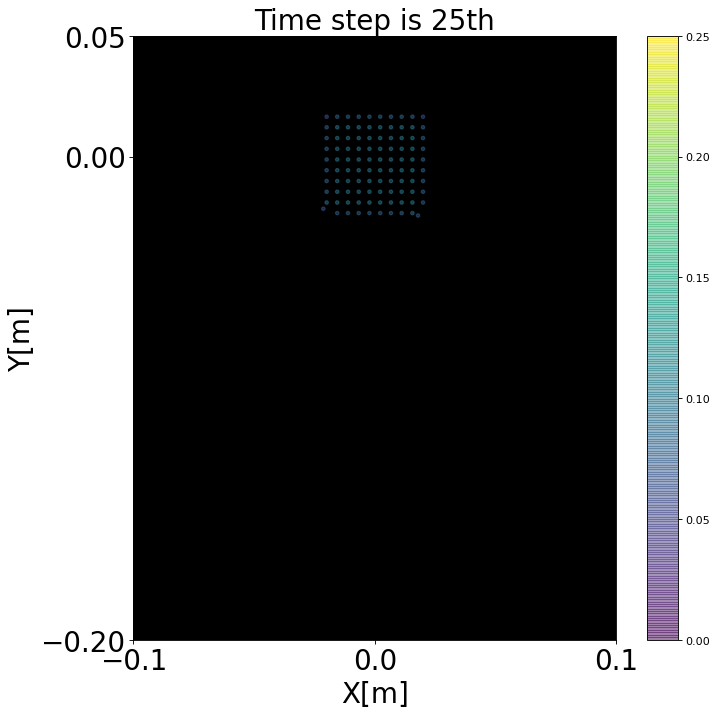

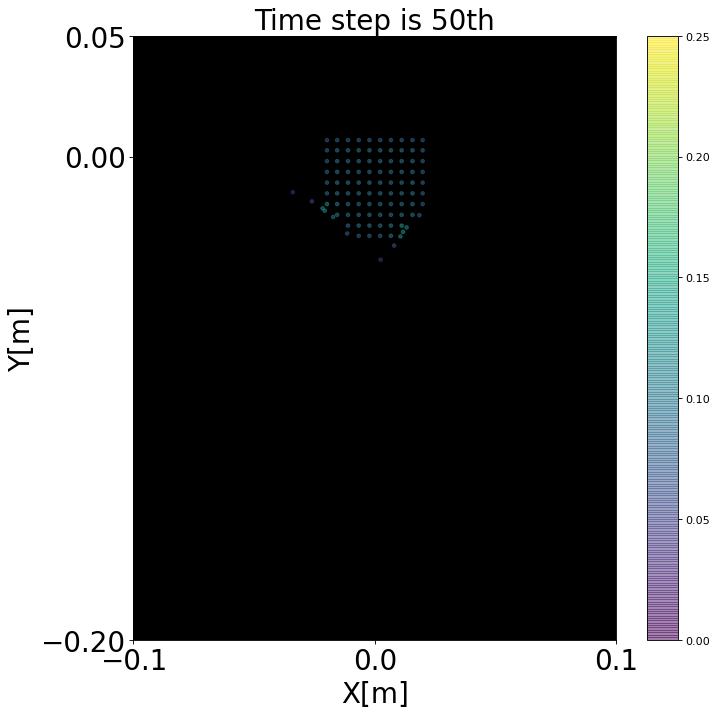

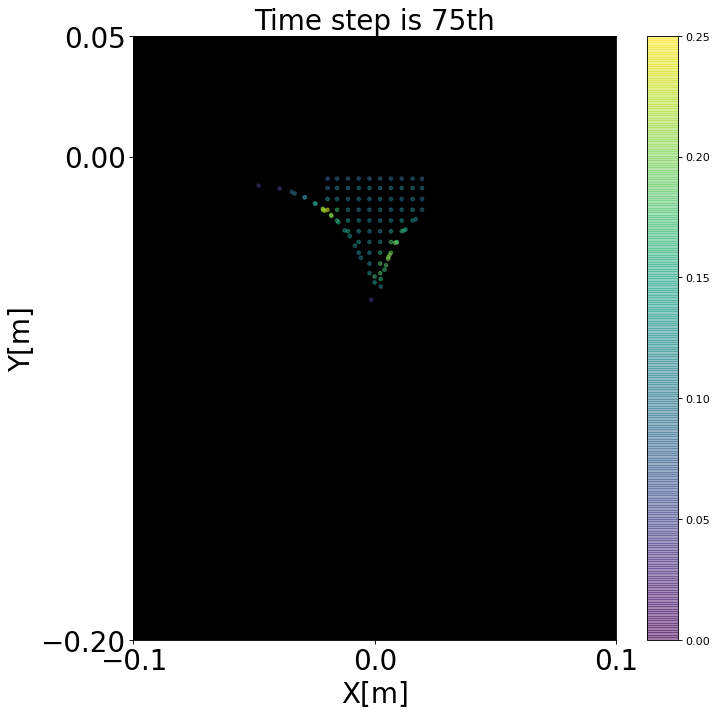

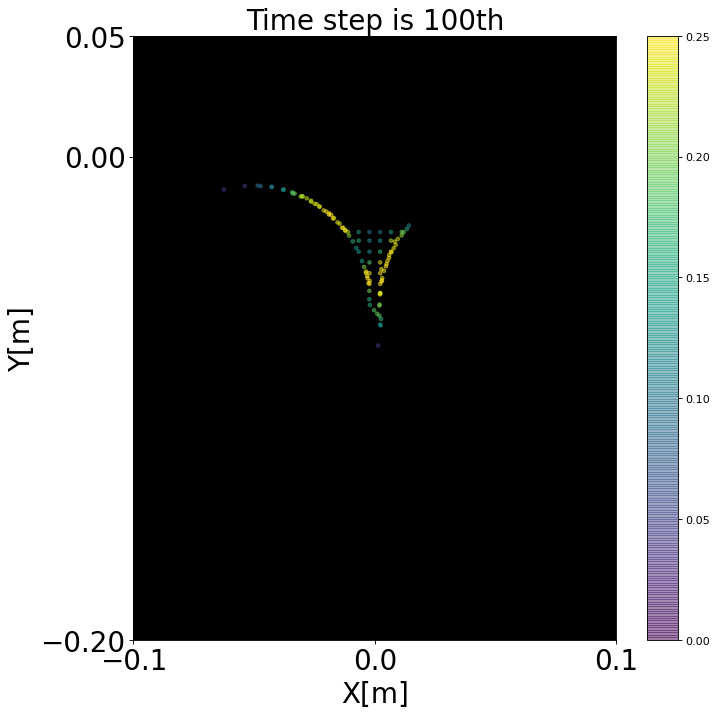

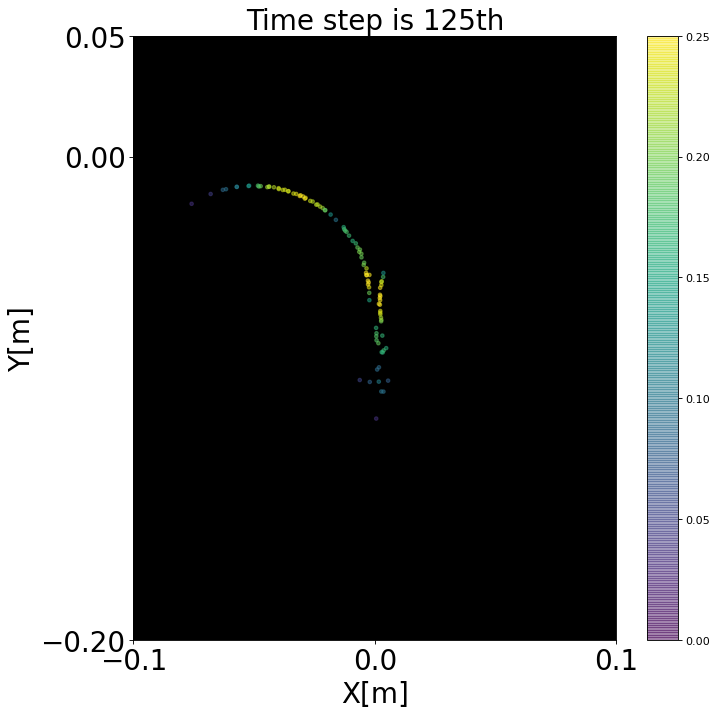

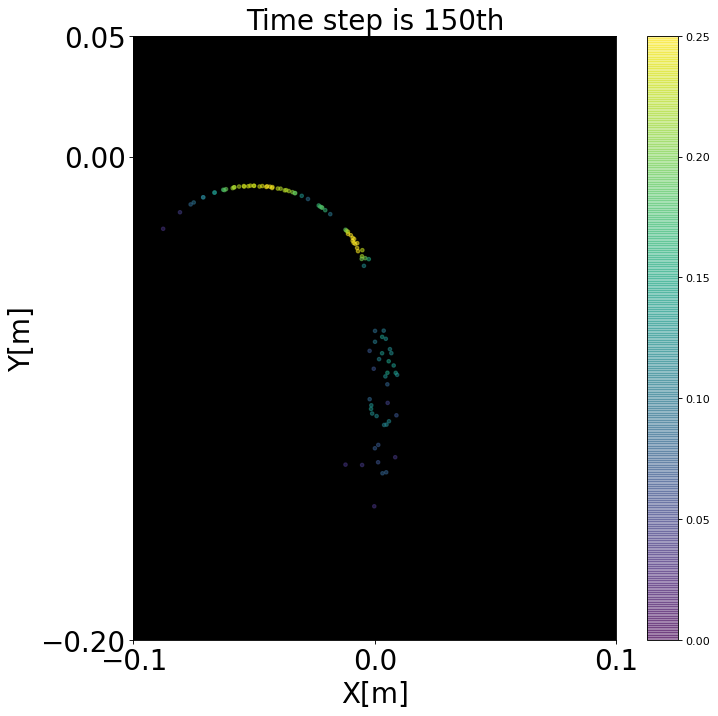

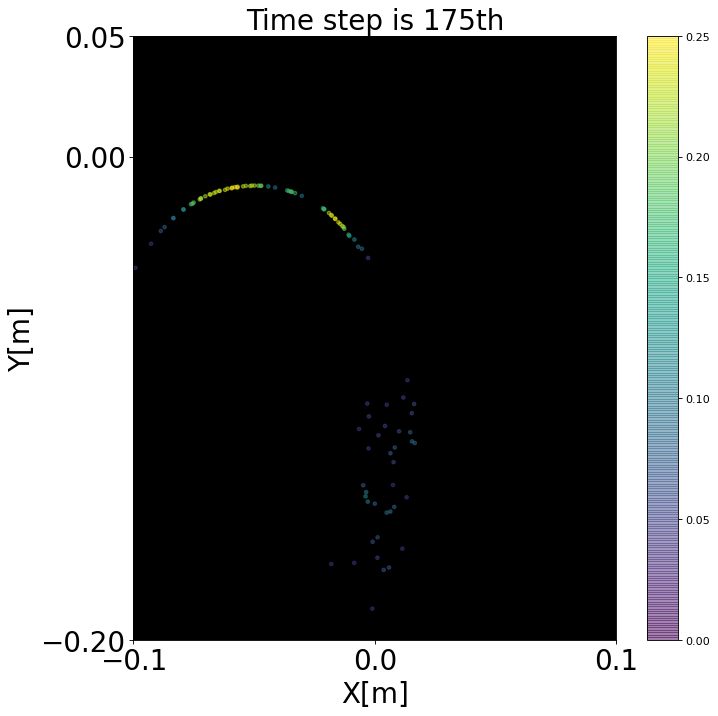

In [20]:
for TimeStep in range(0,200,25):
    fig = plt.figure(figsize=(10, 10), dpi=80)
    ax = plt.subplot()
    
    Data = 24
    plt.sca(ax)
    plt.cla()
    cval = np.maximum(Model7.y_test[Data][TimeStep] , 0).flatten()
    plt.scatter(Model1.y_test[Data][TimeStep], Model2.y_test[Data][TimeStep], c=cval, s=10, alpha=0.5)
    ax.set(xlim=(-0.10, 0.10), ylim=(-0.20, 0.05))
    ax.set_aspect('equal', 'box')
    ax.set_xticks([-0.10, 0, 0.10])
    ax.set_yticks([-0.20, 0, 0.05])
    ax.set_facecolor('black')
    plt.title(f"Time step is {TimeStep}th",fontsize= 25)
    ax.tick_params(labelsize='large')
    plt.colorbar()
    plt.xlabel('X[m]', fontsize = 25)
    plt.xticks(fontsize= 25)
    plt.yticks(fontsize= 25)
    plt.ylabel('Y[m]',fontsize=25)
    plt.clim(0.0,0.25)
    plt.show()